_Lambda School Data Science_

# Reshape data

Objectives
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- pandas documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Upgrade Seaborn

Run the cell below which upgrades Seaborn and automatically restarts your Google Colab Runtime.

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import seaborn as sns

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [2]:
table1

treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1

"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [3]:
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [4]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [5]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [6]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy.set_index('name')

trt  result
name                    
John Smith     a     NaN
Jane Doe       a    16.0
Mary Johnson   a     3.0
John Smith     b     2.0
Jane Doe       b    11.0
Mary Johnson   b     1.0

## Table 2 --> Tidy

In [7]:
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [8]:
tidy2 = table2.reset_index().melt(id_vars='index')

tidy2 = tidy2.rename(columns={
    'index': 'treatment',
    'variable': 'name',
    'value': 'result'
})

tidy2['treatment'] = tidy2['treatment'].str.replace('treatment', '')

tidy2 = tidy2.sort_values(by='treatment',axis='index')

tidy2.set_index('treatment')


name  result
treatment                      
a            John Smith     NaN
a              Jane Doe    16.0
a          Mary Johnson     3.0
b            John Smith     2.0
b              Jane Doe    11.0
b          Mary Johnson     1.0

So tidy format and melt seem to be about consolidation.

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [9]:
table1

treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1

In [10]:
tidy

name trt  result
0    John Smith   a     NaN
1      Jane Doe   a    16.0
2  Mary Johnson   a     3.0
3    John Smith   b     2.0
4      Jane Doe   b    11.0
5  Mary Johnson   b     1.0

In [11]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt              a     b
name                    
Jane Doe      16.0  11.0
John Smith     NaN   2.0
Mary Johnson   3.0   1.0

## Tidy --> Table 2

In [12]:
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [13]:
tidy2

treatment          name  result
0         a    John Smith     NaN
2         a      Jane Doe    16.0
4         a  Mary Johnson     3.0
1         b    John Smith     2.0
3         b      Jane Doe    11.0
5         b  Mary Johnson     1.0

In [14]:
tidy2.pivot_table(index='treatment', columns = 'name', values = 'result')

name       Jane Doe  John Smith  Mary Johnson
treatment                                    
a              16.0         NaN           3.0
b              11.0         2.0           1.0

# Seaborn example
The rules can be simply stated:

* Each variable is a column
* Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [15]:
sns.catplot(x='trt',y='result', col='name', kind='bar', data=tidy, height=2)

AttributeError: ignored

## Load Instacart data

Let's return to the dataset of [3 Million Instacart Orders](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)

If necessary, uncomment and run the cells below to re-download and extract the data

In [16]:
 !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-03-28 04:20:36--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.104.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.104.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  63.5MB/s    in 3.1s    

2019-03-28 04:20:40 (63.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [17]:
 !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


Run these cells to load the data

In [18]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [20]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [22]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [23]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [24]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']]
         .merge(order_products[['order_id','product_id']])
         .merge(orders[['order_id','order_hour_of_day']]))

In [26]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [27]:
merged.head()

product_id                product_name  order_id  order_hour_of_day
0           1  Chocolate Sandwich Cookies      1107                 11
1         769      Sliced American Cheese      1107                 11
2        6184                 Clementines      1107                 11
3        8048     Packaged Grape Tomatoes      1107                 11
4        9007              Frosted Flakes      1107                 11

In [28]:
condition = merged['product_name'].isin(['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized'])
subset = merged[condition]
merged.shape, subset.shape

((33819106, 4), (5978, 4))

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=="Half And Half Ultra Pasteurized"]

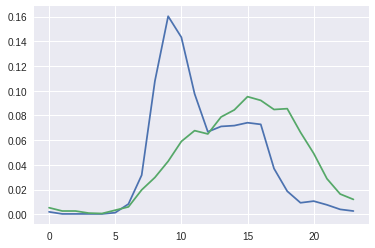

In [30]:
(cream['order_hour_of_day']
.value_counts(normalize=True)
.sort_index()
.plot())

(froyo['order_hour_of_day']
.value_counts(normalize=True)
.sort_index()
.plot())


### 2. crosstab

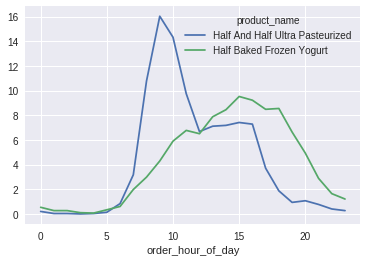

In [31]:
(pd.crosstab(subset['order_hour_of_day'],subset['product_name'],normalize='columns')* 100).plot()

### 3. pivot_table

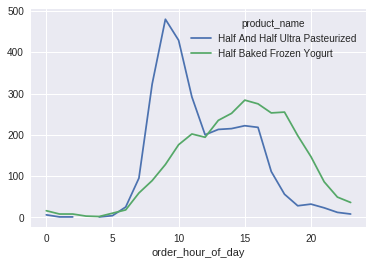

In [32]:
subset.pivot_table(index='order_hour_of_day',
                  columns='product_name',
                  values='order_id',
                  aggfunc=len).plot()

### 4. melt

In [33]:
table = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize = True)

melted = (table
         .reset_index()
         .melt(id_vars='order_hour_of_day')
              .rename(columns={
                  'order_hour_of_day': 'Hour of Day Ordered',
                  'product_name': 'Product',
                  'value': 'Percent of Orders by Product'
              }))
sns.relplot(x='Hour of Day Ordered',
                    y='Percent of Orders by Product',
                    hue='Product',
                    data=melted,
                    kind='line')

AttributeError: ignored

# ASSIGNMENT
- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
  - Table 2 --> Tidy
  - Tidy --> Table 2

- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')
flights.head()

In [0]:
flights.columns.tolist()

In [0]:
flights.index.tolist()

In [0]:
flights.pivot_table(index='year',columns='month',values='passengers')

# STRETCH OPTIONS

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [34]:
'''most recent order
I would get the order id,maybe the time of day, the products that were purchased'''
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [0]:
order_products.columns.tolist()

In [0]:
orders.columns.tolist()

In [0]:
to_csv()#look that up

In [0]:
'''order day of week because most recent, 
order hour of day so we can see the most recent hour in the recent day,
user id so we can see who ordered what,
product name so I can show what was ordered,
order_number because that show the sequence so I dont need the times'''
#product_name,order_number,user_id
#from orders:user_id, order_number, order_id
#from products:product_name, product_id
#from order_products:order_id, product_id

merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id','user_id','order_number']]))


In [36]:
subset = merged[['product_name','order_number','user_id']]
subset.head()

product_name  order_number  user_id
0  Chocolate Sandwich Cookies             2    38259
1      Sliced American Cheese             2    38259
2                 Clementines             2    38259
3     Packaged Grape Tomatoes             2    38259
4              Frosted Flakes             2    38259

In [0]:
final = subset.groupby(['user_id'])[['order_number','product_name']].agg({'order_number':'max'})

In [42]:
final.to_csv()
#whew that's a lot of users

',order_number,order_number\n,order_number,product_name\nuser_id,,\n1,11,Zero Calorie Cola\n2,15,Wild Albacore Tuna No Salt Added\n3,12,Whole Almonds\n4,5,Yellow Corn Tortilla Chips\n5,5,Whole Vitamin D Milk\n6,3,Strained Tomatoes\n7,21,Yukon Gold Potatoes 5lb Bag\n8,4,Vidalia Onions\n9,4,Zero Calorie Cola Soda\n10,6,White Onion\n11,7,Zero Calorie Tonic Water\n12,5,Unsweetened Original Almond Breeze Almond Milk\n13,13,Whole Wheat Pita Bread Loaves\n14,14,Yellow Corn Meal\n15,22,Wint-O-Green\n16,6,Vanilla Ice Cream\n17,41,"White meat chicken, shredded cabbage, julienne yellow carrots and spicy red coconut flavored curry Thai-Style Chicken Spring Rolls"\n18,7,Zucchini Noodles\n19,9,Whole Kernel Corn No Salt Added\n20,4,Popcorn\n21,34,Zero Calories Berry Nutrient Enhanced Water\n22,15,Yogurt Pretzels\n23,5,Yellow Enriched & Degerminated Corn Meal\n24,19,Variety Pack\n25,3,Uncured Pepperoni\n26,12,White Unscented Facial Tissue\n27,82,Zero Vitamin Water\n28,24,Yellow Onions\n29,19,Vanilla C

In [43]:
final

order_number                                                   
        order_number                                       product_name
user_id                                                                
1                 11                                  Zero Calorie Cola
2                 15                   Wild Albacore Tuna No Salt Added
3                 12                                      Whole Almonds
4                  5                         Yellow Corn Tortilla Chips
5                  5                               Whole Vitamin D Milk
6                  3                                  Strained Tomatoes
7                 21                        Yukon Gold Potatoes 5lb Bag
8                  4                                     Vidalia Onions
9                  4                             Zero Calorie Cola Soda
10                 6                                        White Onion
11                 7                           Zero Calorie Tonic Water
12                 5     Unsweetened Original Almond Breeze Almond Milk
13                13                      Whole Wheat Pita Bread Loaves
14                14                                   Yellow Corn Meal
15                22                                       Wint-O-Green
16                 6                                  Vanilla Ice Cream
17                41  White meat chicken, shredded cabbage, julienne...
18                 7                                   Zucchini Noodles
19                 9                    Whole Kernel Corn No Salt Added
20                 4                                            Popcorn
21                34        Zero Calories Berry Nutrient Enhanced Water
22                15                                    Yogurt Pretzels
23                 5           Yellow Enriched & Degerminated Corn Meal
24                19                                       Variety Pack
25                 3                                  Uncured Pepperoni
26                12                      White Unscented Facial Tissue
27                82                                 Zero Vitamin Water
28                24                                      Yellow Onions
29                19                     Vanilla Caramel Coffee Creamer
30                 9          Tall Kitchen Bag With Febreze Odor Shield
...              ...                                                ...
206180            18                                      Yellow Onions
206181            15                              Whole Peeled Tomatoes
206182            10                                  Yukon Gold Potato
206183            14                                      Whole Almonds
206184             5                                          Vegan Egg
206185            11  Whitening Plus Scope Crest Complete Whitening ...
206186             4                                              Water
206187            34                                      Yellow Onions
206188             8                                      Yellow Onions
206189             6   Vitamin C 1,000 mg Raspberry  Dietary Supplement
206190             9                                         White Corn
206191             6                                      Whole Almonds
206192            14                           Whole Wheat Eggo Waffles
206193            42                                 Yellow Bell Pepper
206194            11                                 Zero Vitamin Water
206195            20                           Unsalted Homemade Butter
206196             5                    Unsulphured Blackstrap Molasses
206197            23                      Wild Sardines in Spring Water
206198             8                            Whole Grain Penne Pasta
206199            20                                          Zero Soda
206200            24                                 Whole Strawberries
206201            32       vitaminwater® XXX Aca

In [0]:
'''tidy = subset.reset_index().melt()

tidy = tidy.rename(columns={
    'user_id': 'User ID',
    'order_number': 'Purchase Number',
    'product_name': 'Product Name'
})

tidy.set_index('Purchase Number')

'''